In [47]:
!pip install streamlit mlxtend lightgbm xgboost seaborn plotly

In [2]:
!pip install --upgrade scipy optuna==2.10.0 comet_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.1/645.1 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import warnings
import math
import os
import gc
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import ParameterSampler, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import streamlit as st
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from prettytable import PrettyTable
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
import comet_ml
from comet_ml import Experiment
import multiprocessing
import pickle, joblib
from sklearn.metrics import matthews_corrcoef, roc_auc_score, precision_recall_curve, confusion_matrix, classification_report, roc_curve, auc,accuracy_score,precision_score, recall_score
from sklearn.utils import resample
from IPython.display import Markdown, display
%matplotlib inline
from scipy import stats
from scipy.stats.contingency import association
import matplotlib.ticker as mtick
from collections import Counter
from sklearn.metrics import auc, f1_score, roc_curve, roc_auc_score

In [5]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
# padding value
left_padding = 21

# seed value
SEED = 42

# set optuna verbosity level
optuna_verbosity = optuna.logging.WARNING # https://optuna.readthedocs.io/en/latest/reference/logging.html#module-optuna.logging

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)

### **EDA**



In [7]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/portingchurn.csv")
print('DATA :',df)
print("Duplicates", df.duplicated().sum())
print("Data columns :" , df.columns)
print("Target variable :",df['SwBh'].value_counts())
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.groupby('SwBh').count()
print('Data info:',df.info())
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values[missing_values > 0])

DATA :                   Name  Age  Gender ProfessionBusiness UrbanRural  \
0           Customer_1   63    Male            Student      Rural   
1           Customer_2   62  Female            Student      Urban   
2           Customer_3   24  Female           Business      Rural   
3           Customer_4   36  Female           Employee      Urban   
4           Customer_5   46  Female             Farmer      Rural   
...                ...  ...     ...                ...        ...   
99995   Customer_99996   33    Male           Business      Rural   
99996   Customer_99997   62  Female           Business      Rural   
99997   Customer_99998   64    Male             Farmer      Rural   
99998   Customer_99999   51  Female             Farmer      Rural   
99999  Customer_100000   27  Female           Employee      Urban   

      RecipientOperator  SI  SwBh  Servqual       Sat       PSB       ESB  \
0           Tata Docomo   4     1  3.900992  4.826031  5.000000  2.290631   
1         

Churn Distribution

In [8]:
type_ = ["0", "1"]
colors = ['green', 'red']
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Pie(
        labels=type_,
        values=df['SwBh'].value_counts(),
        name="Churn",
        marker=dict(colors=colors)
    )
)

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

Correlation Heatmap

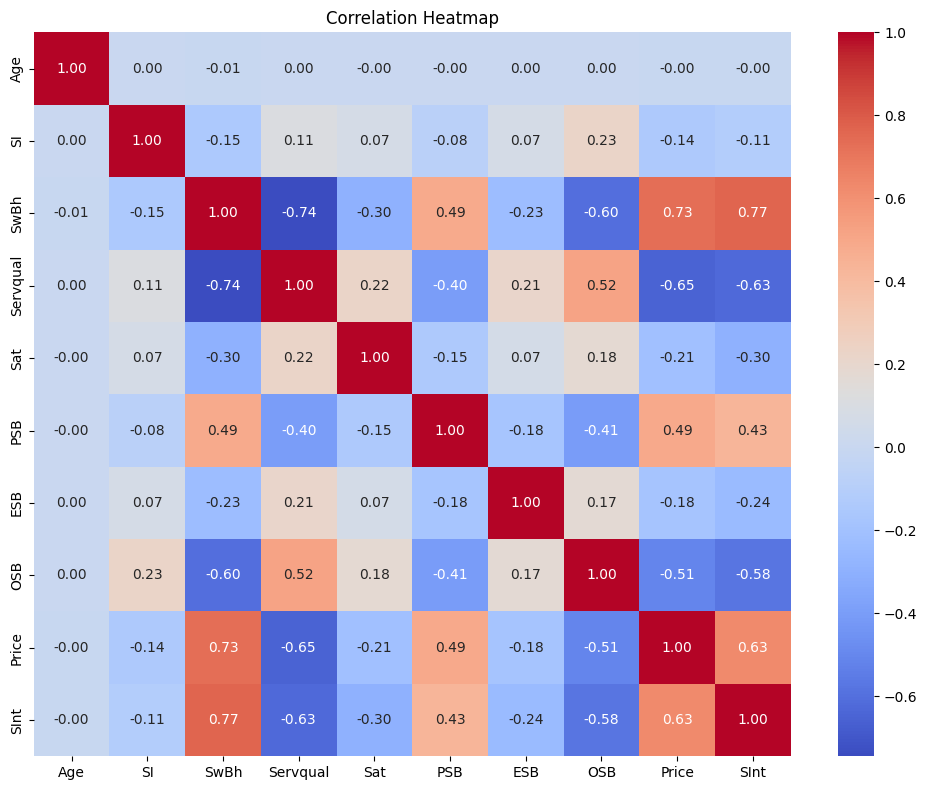

In [9]:
plt.figure(figsize=(10, 8))
x = df.select_dtypes(include=["int64","float64"])
correlation_matrix = x.corr(method='pearson', min_periods=1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()


Analyze Columns

> Gender , ProfessionBusiness , UrbanRural , RecipientOperator





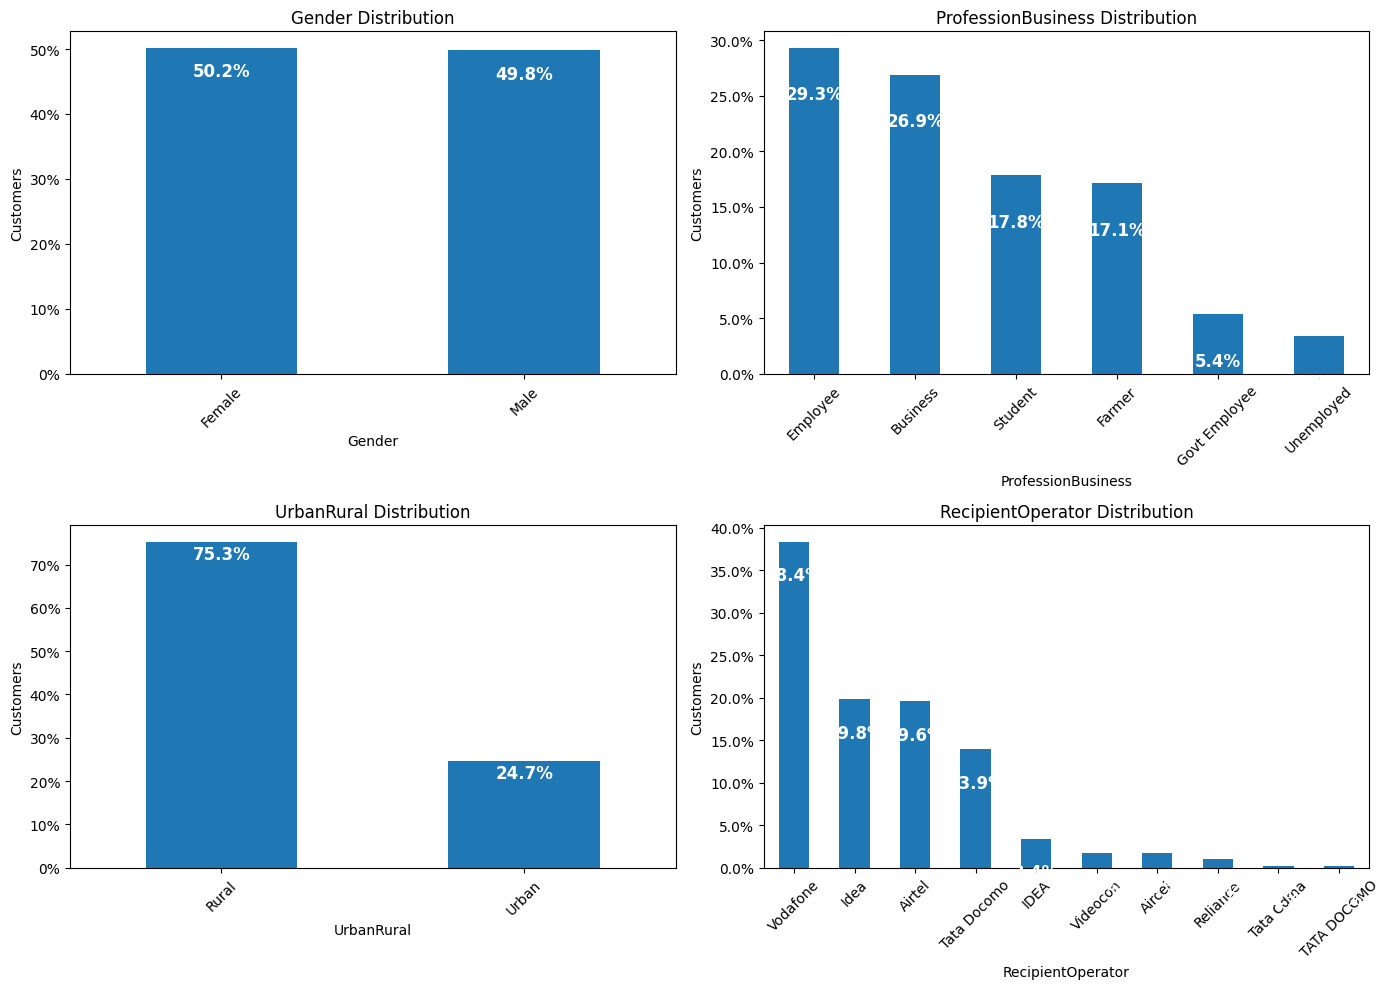

In [10]:
def bar_plots(data, column, ax=None):

    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = None

    (data[column].value_counts()*100.0 / len(data)).plot(kind='bar', stacked=True, ax=ax, rot=45)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('Customers')
    ax.set_xlabel(column)
    ax.set_title(column + ' Distribution')

    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2., i.get_height() - 5, \
                str(round((i.get_height()), 1)) + '%',
                fontsize=12, color='white', ha='center', va='bottom', weight='bold')

    plt.tight_layout()

    return fig, ax
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
columns = ['Gender','ProfessionBusiness','UrbanRural','RecipientOperator']
for column, ax in zip(columns, axes.flatten()):
    bar_plots(df, column, ax)

plt.show()

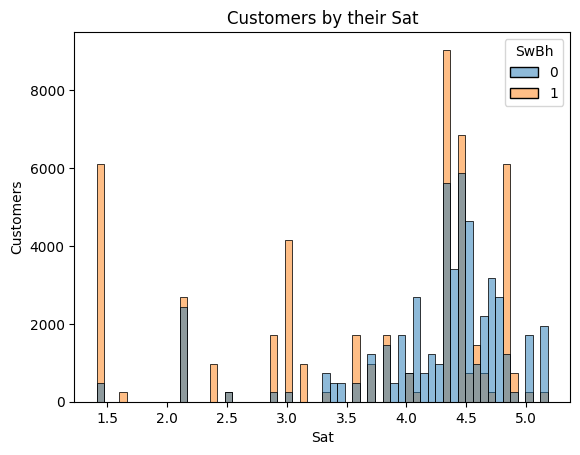

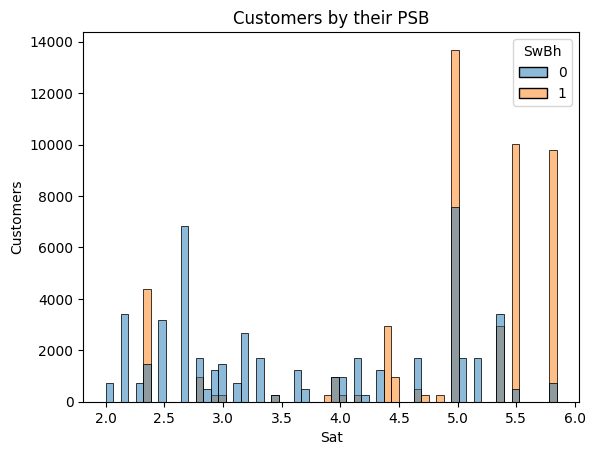

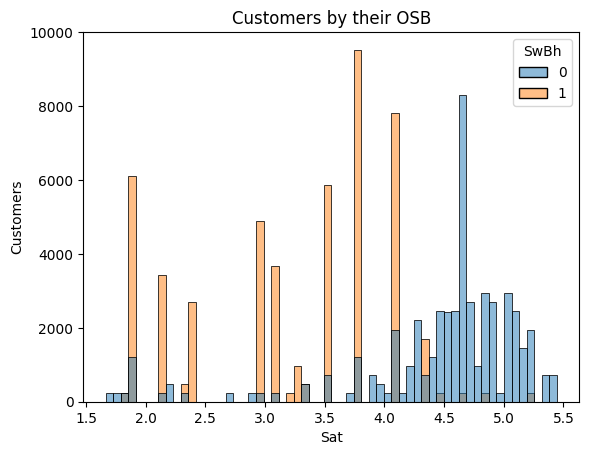

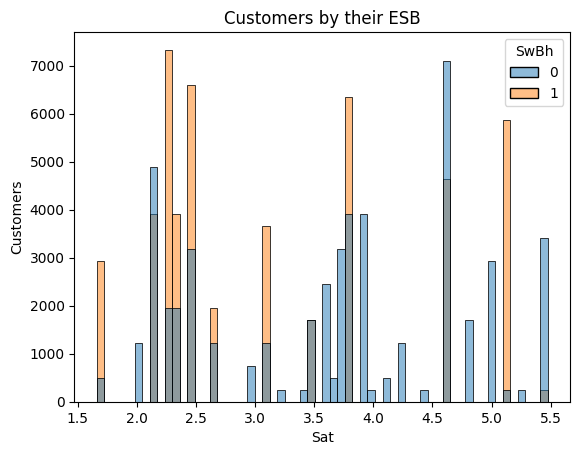

In [11]:
ax = sns.histplot(data = df, x= 'Sat', hue='SwBh', kde=False, bins=60)
ax.set_ylabel('Customers')
ax.set_xlabel('Sat')
ax.set_title('Customers by their Sat')
plt.show()
ax = sns.histplot(data = df, x= 'PSB', hue='SwBh', kde=False, bins=60)
ax.set_ylabel('Customers')
ax.set_xlabel('Sat')
ax.set_title('Customers by their PSB')
plt.show()
ax = sns.histplot(data = df, x= 'OSB', hue='SwBh', kde=False, bins=60)
ax.set_ylabel('Customers')
ax.set_xlabel('Sat')
ax.set_title('Customers by their OSB')
plt.show()
ax = sns.histplot(data = df, x= 'ESB', hue='SwBh', kde=False, bins=60)
ax.set_ylabel('Customers')
ax.set_xlabel('Sat')
ax.set_title('Customers by their ESB')
plt.show()

Analayze Recipient Operator Column

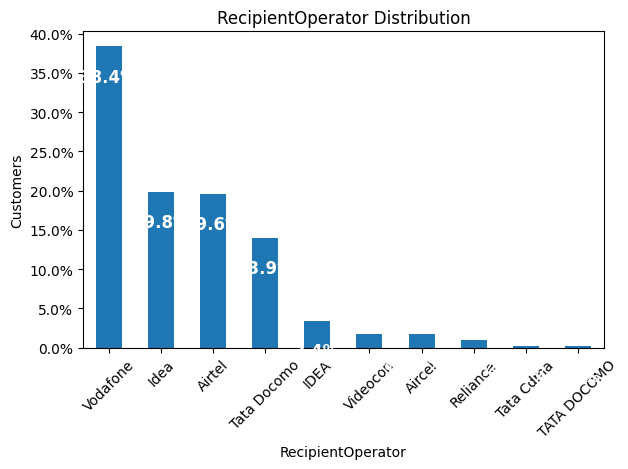

In [12]:
fig = px.histogram(df, x="SwBh", color = "RecipientOperator", barmode = "group", title = "<b>Customer Recipient Operator")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()
bar_plots(df, 'RecipientOperator')
plt.show()

Analyzing other columns

> Prices , SInt , Servqual



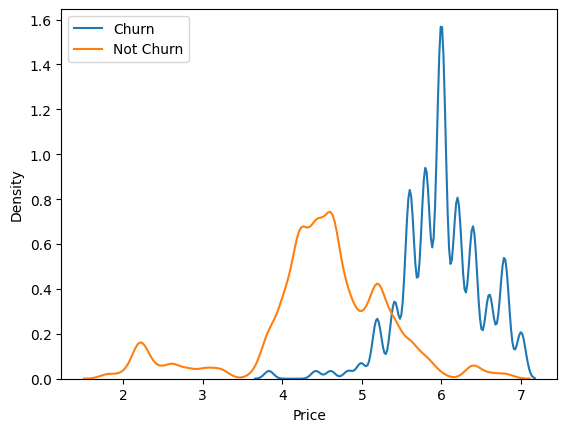

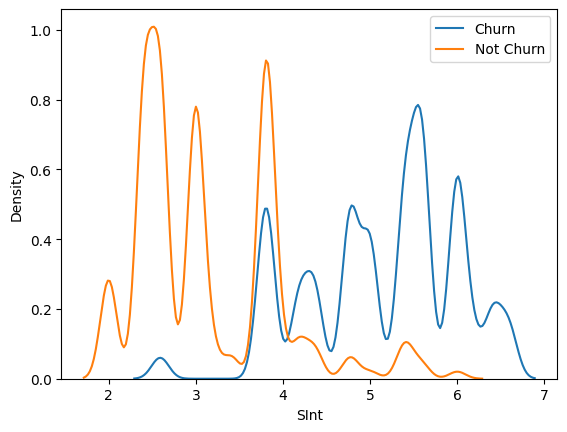

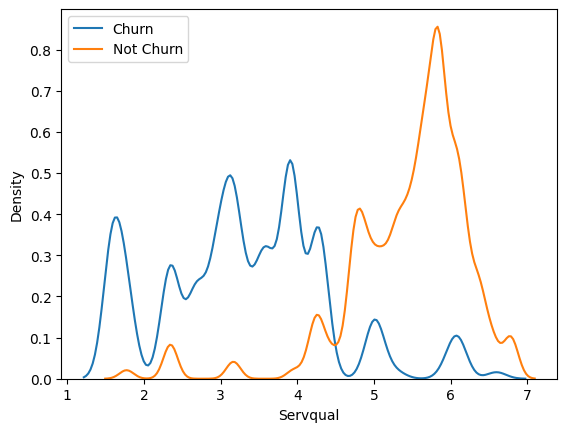

In [13]:
fig, ax = plt.subplots()
sns.kdeplot(df[df["SwBh"] == 1]['Price'],label = "Churn", ax= ax)
sns.kdeplot(df[df["SwBh"] == 0]['Price'], label = "Not Churn", ax=ax)
ax.set_xlabel("Price");
plt.legend()
plt.show()
fig, ax = plt.subplots()
sns.kdeplot(df[df["SwBh"] == 1]['SInt'],label = "Churn", ax= ax)
sns.kdeplot(df[df["SwBh"] == 0]['SInt'], label = "Not Churn", ax=ax)
ax.set_xlabel("SInt");
plt.legend()
plt.show()
fig, ax = plt.subplots()
sns.kdeplot(df[df["SwBh"] == 1]['Servqual'],label = "Churn", ax= ax)
sns.kdeplot(df[df["SwBh"] == 0]['Servqual'], label = "Not Churn", ax=ax)
ax.set_xlabel("Servqual");
plt.legend()
plt.show()


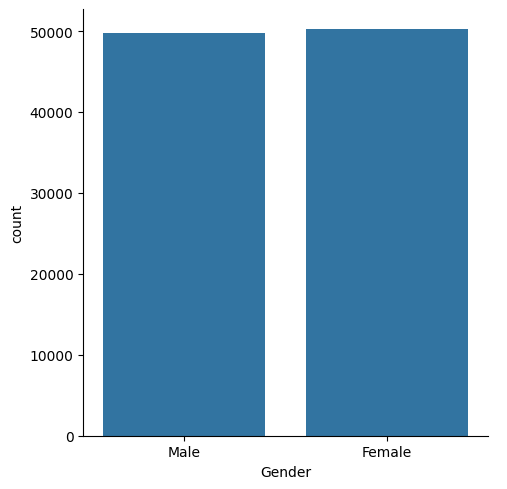

Count of males: 49784
Count of females: 50216


In [14]:
sns.catplot(x="Gender", kind="count", data=df)
plt.show()
gender_counts = df['Gender'].value_counts()
print("Count of males:", gender_counts['Male'])
print("Count of females:", gender_counts['Female'])

Binning for
>  Servqual , Price , SInt

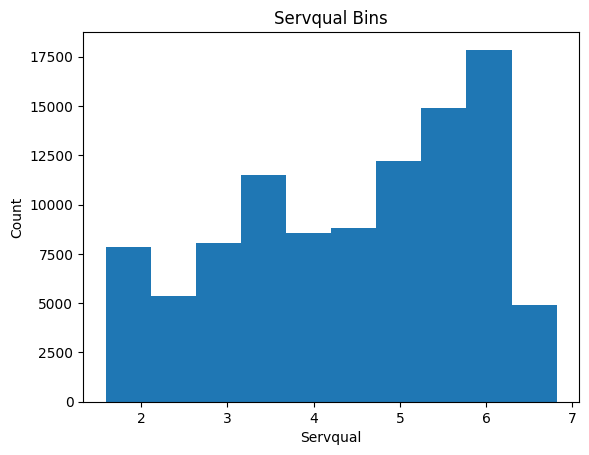

**Value Range**
Low ( 1.59 -  3.33)
Medium ( 3.33 -  5.07)
High ( 5.07 -  6.82)


,Servqual,Servqual-binned
0,3.900992,Medium
1,6.084887,High
2,5.903736,High
3,5.852901,High
4,6.146615,High
5,2.345679,Low
6,5.733882,High
7,3.126362,Low
8,6.367304,High
9,1.772371,Low


**Binning Distribution**


Servqual-binned
High      40098
Medium    33251
Low       26651
Name: count, dtype: int64

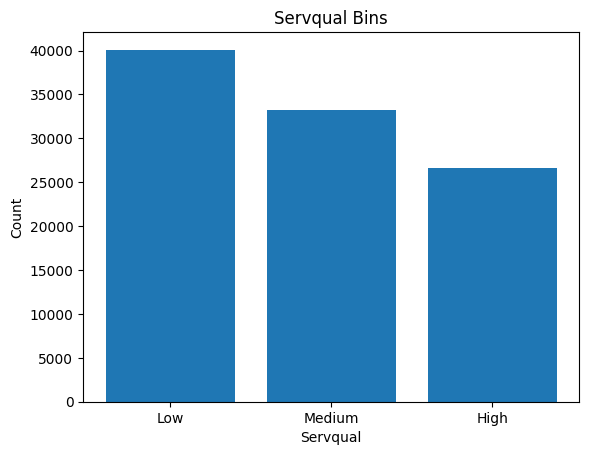

In [11]:
def binning_feature(feature):
  plt.hist(df[feature])

  # set x/y labels and plot title
  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()

  bins = np.linspace(min(df[feature]), max(df[feature]), 4)
  print("**Value Range**")

  print(f"Low ({bins[0] : .2f} - {bins[1]: .2f})")
  print(f"Medium ({bins[1]: .2f} - {bins[2]: .2f})")
  print(f"High ({bins[2]: .2f} - {bins[3]: .2f})")
  group_names = ['Low', 'Medium', 'High']

  df.insert(df.shape[1]-1,f'{feature}-binned', pd.cut(df[feature], bins, labels=group_names, include_lowest=True))
  display(df[[feature, f'{feature}-binned']].head(10))


  # count values
  print("**Binning Distribution**")
  display(df[f'{feature}-binned'].value_counts())


  # plot the distribution of each bin
  plt.bar(group_names, df[f'{feature}-binned'].value_counts())
  # px.bar(data_canada, x='year', y='pop')

  # set x/y labels and plot title
  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()


binning_feature('Servqual')

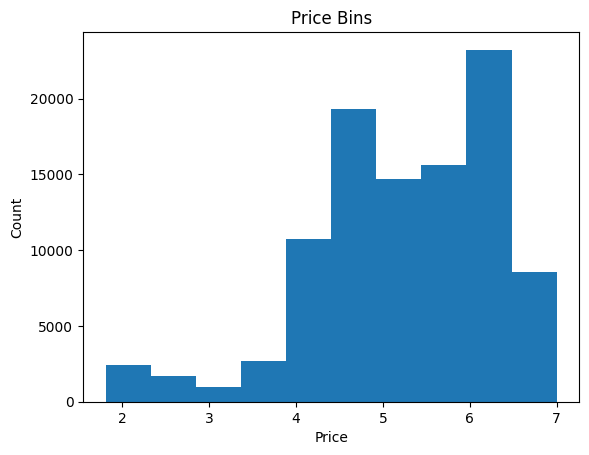

**Value Range**
Low ( 1.81 -  3.54)
Medium ( 3.54 -  5.27)
High ( 5.27 -  7.00)


,Price,Price-binned
0,5.829190,High
1,5.975140,High
2,4.440257,Medium
3,5.417803,High
4,5.193264,Medium
5,6.000000,High
6,4.808340,Medium
7,5.193264,Medium
8,4.615076,Medium
9,5.611067,High


**Binning Distribution**


Price-binned
High      52566
Medium    42299
Low        5135
Name: count, dtype: int64

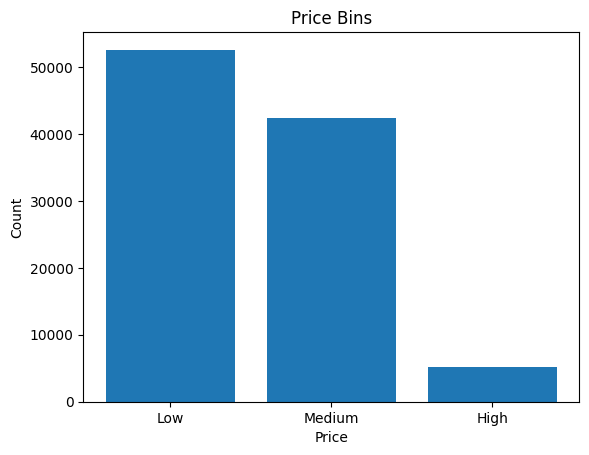

In [12]:
binning_feature('Price')

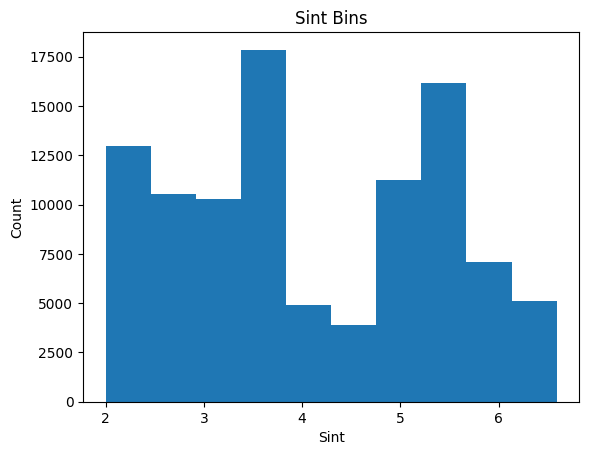

**Value Range**
Low ( 2.00 -  3.53)
Medium ( 3.53 -  5.06)
High ( 5.06 -  6.59)


,SInt,SInt-binned
0,6.590945,High
1,5.409055,High
2,3.818110,Medium
3,3.818110,Medium
4,2.000000,Low
5,4.181890,Medium
6,2.409055,Low
7,6.000000,High
8,4.772836,Medium
9,5.409055,High


**Binning Distribution**


SInt-binned
Medium    37164
Low       34473
High      28363
Name: count, dtype: int64

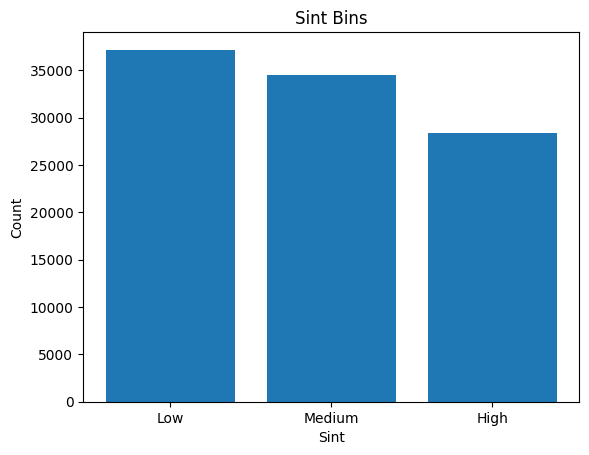

In [13]:
binning_feature('SInt')

**Univariate Analysis**

Statistical Normality Tests

> D’Agostino’s K^2

```
Hypotheses

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.
```

1. Servqual

In [18]:
stat, p = stats.normaltest(df['Servqual'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=23450.04436, p=0.000
Sample does not look Gaussian (reject H0)


2. Sat

In [19]:
stat, p = stats.normaltest(df['Sat'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=19506.55321, p=0.000
Sample does not look Gaussian (reject H0)


3. Price

In [20]:
stat, p = stats.normaltest(df['Price'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=8209.71568, p=0.000
Sample does not look Gaussian (reject H0)


**Bivariate Analysis**

Spearman rank-order correlation


```
Hypotheses
H0: the two samples do not have monotonic relationship
H1: there is a monotonic relationship between the samples
```



In [21]:
def cal_spearmanr(c1, c2):

  alpha = 0.05

  correlation, p_value = stats.spearmanr(df[c1], df[c2])

  print(f'{c1}, {c2} correlation : {correlation}, p : {p_value}')

  if p_value > alpha:
    print('Probably do not have monotonic relationship (fail to reject H0)')
  else:
    print('Probably have monotonic relationship (reject H0)')

# Numerical and Numerical data
cal_spearmanr('Price','Servqual')

Price, Servqual correlation : -0.7011910016985584, p : 0.0
Probably have monotonic relationship (reject H0)


In [22]:
# Categoric and Categoric data
cal_spearmanr('Gender','RecipientOperator')

Gender, RecipientOperator correlation : -0.0063290263242433, p : 0.04534834445375841
Probably have monotonic relationship (reject H0)


Correlation ratio

In [23]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta


correlation_ratio(df['UrbanRural'], df['Servqual'])

0.10320000524627122

In [24]:
correlation_ratio(df['RecipientOperator'], df['Servqual'])

0.2205893226347739

Chi-Square

In [25]:
def calculate_chi_square(feature1, feature2='SwBh'):
  print(f"Correlation between **{feature1}** and **{feature2}**")
  crosstab = pd.crosstab(df[feature1], df[feature2])
  # display(crosstab)
  stat, p, dof, expected = stats.chi2_contingency(crosstab,correction=True)


  print(f'p-value : {p}, degree of freedom: {dof}')
  # print("expected frequencies :\n", expected)

  # interpret test-statistic
  prob = 0.95
  critical = stats.chi2.ppf(prob, dof)
  print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

  if abs(stat) >= critical:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')

  # interpret p-value
  alpha = 1.0 - prob

  print('significance=%.3f, p=%.3f' % (alpha, p))
  if p <= alpha:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')
  print('-----------------------------------\n')
cat_cols = df.select_dtypes(include=["object"])
dichotomous_cols = [cat for cat in cat_cols if df[cat].value_counts().count() == 2]

print("**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**")

for col in dichotomous_cols:
  calculate_chi_square(col)

**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**
Correlation between **Gender** and **SwBh**
p-value : 0.6097306084778715, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.261
Independent (fail to reject H0)
significance=0.050, p=0.610
Independent (fail to reject H0)
-----------------------------------

Correlation between **UrbanRural** and **SwBh**
p-value : 8.877587294995543e-198, degree of freedom: 1
probability=0.950, critical=3.841, stat=900.200
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



**Data Preprocessing**

In [35]:
X = df.drop(columns= ["SwBh"])
y = df["SwBh"]
# Encode categorical variables
categoric_col = X.select_dtypes(include=["object"])
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == object:
        X[col] = le.fit_transform(X[col])
# Assuming 'data' is your DataFrame
X['Servqual-binned'] = X['Servqual-binned'].cat.codes
X['Price-binned'] = X['Price-binned'].cat.codes
X['SInt-binned'] = X['SInt-binned'].cat.codes


X

,Name,Age,Gender,ProfessionBusiness,UrbanRural,RecipientOperator,SI,Servqual,Sat,PSB,ESB,OSB,Price,Servqual-binned,Price-binned,SInt-binned,SInt
0,0,63,1,4,0,7,4,3.900992,4.826031,5.000000,2.290631,2.415218,5.829190,1,2,2,6.590945
1,11112,62,0,4,1,3,5,6.084887,2.126289,2.354730,1.662524,2.972190,5.975140,2,2,2,5.409055
2,22223,24,0,0,0,1,5,5.903736,4.789948,2.801641,5.000000,4.638470,4.440257,2,1,1,3.818110
3,33334,36,0,1,1,9,5,5.852901,4.077320,3.153958,2.139101,2.885670,5.417803,2,2,1,3.818110
4,44445,46,0,2,0,1,5,6.146615,4.307990,3.000000,3.767208,4.705292,5.193264,2,1,0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,33,1,0,0,1,4,5.010490,1.448454,2.354730,4.628107,3.550406,5.417803,1,2,2,6.000000
99996,99997,62,0,0,0,7,5,4.299201,4.434278,5.843629,1.662524,3.550406,6.806736,1,2,2,5.409055
99997,99998,64,1,2,0,3,5,3.126362,4.307990,5.000000,2.476577,3.550406,6.781877,0,2,2,6.409055
99998,99999,51,0,2,0,7,5,5.480110,4.789948,5.000000,5.476577,1.664349,4.032879,2,1,1,3.818110


Standardize features

In [40]:

scaler = StandardScaler()
print(X)
X = pd.DataFrame(scaler.fit_transform(X),index=X.index,columns=X.columns)
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

           Name       Age    Gender  ProfessionBusiness  UrbanRural  \
0     -1.732033  1.241670  1.004329            1.514005   -0.572593   
1     -1.347103  1.176226 -0.995689            1.514005    1.746442   
2     -0.962206 -1.310651 -0.995689           -1.098725   -0.572593   
3     -0.577310 -0.525321 -0.995689           -0.445542    1.746442   
4     -0.192414  0.129120 -0.995689            0.207640   -0.572593   
...         ...       ...       ...                 ...         ...   
99995  1.731930 -0.721654  1.004329           -1.098725   -0.572593   
99996  1.731964  1.176226 -0.995689           -1.098725   -0.572593   
99997  1.731999  1.307115  1.004329            0.207640   -0.572593   
99998  1.732033  0.456341 -0.995689            0.207640   -0.572593   
99999 -1.731860 -1.114319 -0.995689           -0.445542    1.746442   

       RecipientOperator        SI  Servqual       Sat       PSB       ESB  \
0               0.449097 -0.053924 -0.352518  0.895300  0.577901 -1.0

,Name,Age,Gender,ProfessionBusiness,UrbanRural,RecipientOperator,SI,Servqual,Sat,PSB,ESB,OSB,Price,Servqual-binned,Price-binned,SInt-binned,SInt
75220,0.778436,0.652673,-0.995689,0.207640,-0.572593,-1.039536,0.994767,-1.963535,0.895300,0.577901,-0.967814,-0.787121,1.504751,-1.407778,0.886000,0.077309,-0.230371
48955,-0.232562,-1.048875,1.004329,1.514005,1.746442,0.746823,0.994767,0.693448,-0.117471,-1.189068,-1.146979,0.894341,0.153824,1.074047,0.886000,-1.187980,-1.303388
44966,-0.386091,0.849006,1.004329,-0.445542,-0.572593,1.044550,-1.102614,-0.865229,0.498544,-0.243710,1.100998,-2.001898,1.689421,-1.407778,0.886000,0.077309,0.046654
13568,-1.594578,-1.637872,1.004329,0.207640,-0.572593,-1.039536,0.994767,1.016777,0.533782,0.845177,-0.967814,0.098573,-1.125839,1.074047,-0.799404,0.077309,-0.230371
92727,1.452238,0.783561,-0.995689,-0.445542,-0.572593,-1.039536,0.994767,-0.892806,-1.081952,1.255983,1.100998,0.255944,1.109358,-1.407778,0.886000,1.342598,0.981158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.294916,-0.590766,1.004329,0.207640,-0.572593,0.449097,0.994767,-0.352518,0.498544,0.577901,1.531424,-1.442573,0.358417,-0.166866,0.886000,0.077309,-0.230371
54886,-0.004278,0.783561,1.004329,1.514005,1.746442,1.044550,0.994767,0.981321,0.244047,0.593806,1.100998,0.762165,-0.196359,1.074047,-0.799404,-1.187980,-1.303388
76820,0.839993,1.634335,1.004329,0.860823,-0.572593,1.044550,-2.151305,-0.711303,-2.327033,0.988707,0.323466,-0.085155,1.105526,-0.166866,0.886000,0.077309,0.185166
860,1.197107,0.718117,1.004329,-0.445542,1.746442,1.044550,-0.053924,-1.437316,0.370643,0.988707,-1.010123,0.255944,0.900933,-1.407778,0.886000,1.342598,1.431172


In [16]:
r=26
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(criterion = 'entropy',random_state=r),
    "Random Forest": RandomForestClassifier(criterion = 'entropy'),
    "Support Vector Classifier": SVC(kernel='rbf',probability=True),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bagging classifier":BaggingClassifier(random_state=r)
}

In [17]:
DTclassifier = DecisionTreeClassifier(criterion = 'entropy',random_state=r)
RandomForestclassifier = RandomForestClassifier(criterion = 'entropy')
SVMclassifier = SVC(kernel='rbf',probability=True)
LOGISTICclassifier = LogisticRegression()
KNNclassifier = KNeighborsClassifier()
GNBclassifier = GaussianNB()
BaggingClassifier= BaggingClassifier(random_state=r)
GBM = GradientBoostingClassifier(random_state=r)

# fitting model with x train and y train
DTclassifier.fit(X_train, y_train)
RandomForestclassifier.fit(X_train, y_train)
SVMclassifier.fit(X_train, y_train)
LOGISTICclassifier.fit(X_train, y_train)
KNNclassifier.fit(X_train, y_train)
GNBclassifier.fit(X_train, y_train)
BaggingClassifier.fit(X_train, y_train)
GBM.fit(X_train, y_train)

# predict
DTpred = DTclassifier.predict(X_test)
RFpred = RandomForestclassifier.predict(X_test)
SVMpred = SVMclassifier.predict(X_test)
LOGISTICpred = LOGISTICclassifier.predict(X_test)
KNNpred = KNNclassifier.predict(X_test)
GNBpred = GNBclassifier.predict(X_test)
Baggingpred= BaggingClassifier.predict(X_test)
GBMpred= GBM.predict(X_test)

# accuracy for all models
DTaccuracy = accuracy_score(y_test, DTpred)
print("Accuracy of the Decision Tree Classifier: ",DTaccuracy)

RFaccuracy = accuracy_score(y_test, RFpred)
print("Accuracy of the Random Forest Classifier: ",RFaccuracy)

SVMaccuracy = accuracy_score(y_test, SVMpred)
print("Accuracy of the SVM classifier: ",SVMaccuracy)

LOGISTICaccuracy = accuracy_score(y_test, LOGISTICpred)
print("Accuracy of the Logistic Regression Classifier: ",LOGISTICaccuracy)

KNNaccuracy = accuracy_score(y_test, KNNpred)
print("Accuracy of the KNN Classifier: ",KNNaccuracy)

GNBaccuracy = accuracy_score(y_test, GNBpred)
print("Accuracy of the GNB Classifier: ", GNBaccuracy)

Baggingaccuracy = accuracy_score(y_test, Baggingpred)
print("Accuracy of the Bagging Classifier: ", Baggingaccuracy)

GBMaccuracy = accuracy_score(y_test, GBMpred)
print("Accuracy of the GBM Classifier: ", GBMaccuracy)

Accuracy of the Decision Tree Classifier:  1.0
Accuracy of the Random Forest Classifier:  1.0
Accuracy of the SVM classifier:  1.0
Accuracy of the Logistic Regression Classifier:  0.95915
Accuracy of the KNN Classifier:  1.0
Accuracy of the GNB Classifier:  0.9597
Accuracy of the Bagging Classifier:  1.0
Accuracy of the GBM Classifier:  1.0


In [24]:
# Define the GBM Classifier
gbm = GradientBoostingClassifier()
# Load the model from the pickle file
loaded_model = pickle.load(open('gbm_model.pkl', 'rb'))
# Define the hyperparameter grid for RandomizedSearchCV
gbm_params = {
    'learning_rate': uniform(0.01, 0.5),
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Define RandomizedSearchCV
random_search_gbm = RandomizedSearchCV(estimator=gbm,
                                       param_distributions=gbm_params,
                                       scoring='accuracy',
                                       cv=5,
                                       n_iter=50,
                                       verbose=1,
                                       n_jobs=-1)

# Fit RandomizedSearchCV
X_train.drop(columns=["Name","Servqual-binned","Price-binned","SInt-binned","SInt"],inplace=True)
X_test.drop(columns=["Name","Servqual-binned","Price-binned","SInt-binned","SInt"],inplace=True)
random_search_gbm.fit(X_train, y_train)

pickle.dump(random_search_gbm.best_estimator_, open('gbm_model.pkl', 'wb'))

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 1.0


Predicted Class: Not Switched


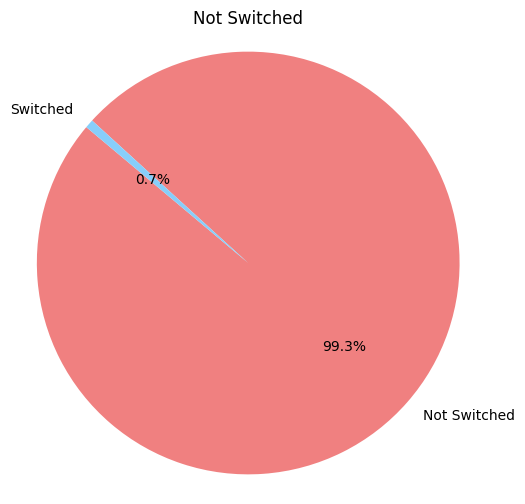

In [37]:
clf = GradientBoostingClassifier()
X_train = X_train.drop(columns=["Name","Servqual-binned","Price-binned","SInt-binned"])
X_test = X_test.drop(columns=["Name","Servqual-binned","Price-binned","SInt-binned"])
# Train the classifier
clf.fit(X_train, y_train)
# Save the trained model as a pickle file
with open('gbm_model.pkl', 'wb') as file:
    pickle.dump(clf, file)
# Make predictions on new data (df)
prediction_proba = clf.predict_proba(X_test)

# Determine prediction label based on probabilities
predicted_class = "Switched" if prediction_proba[0, 1] > prediction_proba[0, 0] else "Not Switched"
print("Predicted Class:", predicted_class)

# Set up pie chart colors and sizes
d_nc = prediction_proba[0, 0] * 100
d_c = prediction_proba[0, 1] * 100

# Function to create and display pie chart
def make_pie(sizes, text, colors, labels):
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(text)
    plt.axis('equal')
    plt.show()

# Colors for the pie chart
c1 = 'lightcoral'  # Red
c2 = 'lightskyblue'  # Blue

# Create and display pie chart
make_pie([d_nc, d_c], predicted_class, [c1, c2], ['Not Switched', 'Switched'])



Sidebar - Classifier Selection

In [29]:
st.sidebar.title("Classifier Selection")
selected_classifier = st.sidebar.selectbox("Select Classifier", list(classifiers.keys()), index=0)

2024-04-17 05:38:14.665 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


Initialize selected classifier outside button click scope

In [30]:
classifier = classifiers[selected_classifier]

Model Training and Evaluation

In [31]:

if st.sidebar.button("Train and Evaluate"):
    # Train the model
    classifier.fit(X_train, y_train)

    # Perform predictions
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_test, y_pred)

     # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Render the plot in Streamlit
    st.header(selected_classifier)
    st.write("Accuracy:", accuracy)
    st.write("Classification Report:")
    st.write(pd.DataFrame(class_report).T)
    st.write("Confusion Matrix:")
    # Display results
    fig, ax = plt.subplots(figsize=(4, 3))
    # Create heatmap
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt="d", linecolor="k", linewidths=3, ax=ax)
    # Set title
    ax.set_title(accuracy, fontsize=14)
    # Render the plot in Streamlit
    st.pyplot(fig)

    # Cross-validation
    st.subheader("Cross Validation")
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
    st.write("Cross Validation Scores:", cv_scores)
    st.write("Average Accuracy:", np.mean(cv_scores))

    # Plot ROC curve
    st.subheader("ROC Curve")
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    st.pyplot(fig)

    # Plot Decision Tree
    if selected_classifier == "Decision Tree":
        fig, ax = plt.subplots(figsize=(20, 10))
        plot_tree(classifier, filled=True, feature_names=X.columns, ax=ax)
        st.pyplot(fig)



Input and Predict

In [32]:
st.sidebar.title("Input and Predict")
input_data = {}
# Initialize session state variables
if "slider_values" not in st.session_state:
    st.session_state.slider_values = {
        'SI': 5,
        'Servqual': 5,
        'Sat': 5,
        'PSB': 5,
        'ESB': 5,
        'OSB': 5,
        'Price': 5.0,
        'SInt': 5
    }
# Define the function to update slider values based on gender
def update_slider_values(gender):
    if gender == 'Male':
        st.session_state.slider_values['SI'] = 5
    else:
        st.session_state.slider_values.update({
            'Servqual': 5,
            'Sat': 5,
            'PSB': 5,
            'ESB': 5,
            'OSB': 5,
            'Price': 5.0,
            'SInt': 5
        })
def user_input_features():
    # Gender mapping
    #Age mapping
    age = st.sidebar.slider('Age', min_value=0, max_value=100, value=st.session_state.get('slider_values', {}).get('Age', 5))
    gender_mapping = {'Male': 1, 'Female': 0}
    gender = st.sidebar.selectbox('Gender', ('Male', 'Female'), format_func=lambda x: x, key='gender')

    # Profession/Business mapping
    profession_business_mapping = {'Yes': 1, 'No': 0}
    profession_business = st.sidebar.selectbox('Profession/Business', ('Yes', 'No'), format_func=lambda x: x, key='profession_business')

    # Urban/Rural mapping
    urban_rural_mapping = {'Urban': 1, 'Rural': 0}
    urban_rural = st.sidebar.selectbox('Urban/Rural', ('Urban', 'Rural'), format_func=lambda x: x, key='urban_rural')

    # Recipient Operator mapping
    recipient_operator_mapping = {'Operator A': 0, 'Operator B': 1, 'Operator C': 2}
    recipient_operator = st.sidebar.selectbox('Recipient Operator', ('Operator A', 'Operator B', 'Operator C'), format_func=lambda x: x, key='recipient_operator')

    # Slider values
    si = st.sidebar.slider('SI', min_value=0, max_value=10, value=st.session_state.get('slider_values', {}).get('SI', 5))
    servqual = st.sidebar.slider('Servqual', min_value=0, max_value=10, value=st.session_state.get('slider_values', {}).get('Servqual', 5))
    sat = st.sidebar.slider('Sat', min_value=0, max_value=10, value=st.session_state.get('slider_values', {}).get('Sat', 5))
    psb = st.sidebar.slider('PSB', min_value=0, max_value=10, value=st.session_state.get('slider_values', {}).get('PSB', 5))
    esb = st.sidebar.slider('ESB', min_value=0, max_value=10, value=st.session_state.get('slider_values', {}).get('ESB', 5))
    osb = st.sidebar.slider('OSB', min_value=0, max_value=10, value=st.session_state.get('slider_values', {}).get('OSB', 5))
    price = st.sidebar.slider('Price', min_value=0.0, max_value=10.0, value=st.session_state.get('slider_values', {}).get('Price', 5.0))
    sint = st.sidebar.slider('SInt', min_value=0, max_value=10, value=st.session_state.get('slider_values', {}).get('SInt', 5))

    # Create DataFrame from user input
    user_input = {
        'Age': age,
        'Gender': gender_mapping[gender],
        'ProfessionBusiness': profession_business_mapping[profession_business],
        'UrbanRural': urban_rural_mapping[urban_rural],
        'RecipientOperator': recipient_operator_mapping[recipient_operator],
        'SI': si,
        'Servqual': servqual,
        'Sat': sat,
        'PSB': psb,
        'ESB': esb,
        'OSB': osb,
        'Price': price,
        'SInt': sint
    }
    input_df = pd.DataFrame([user_input])
    return input_df

2024-04-17 05:38:14.741 Session state does not function when running a script without `streamlit run`


In [33]:
input_df = user_input_features()
input_df =  pd.DataFrame(scaler.fit_transform(input_df),index=input_df.index,columns=input_df.columns)

In [34]:
X_train

,Name,Age,Gender,ProfessionBusiness,UrbanRural,RecipientOperator,SI,Servqual,Sat,PSB,ESB,OSB,Price,Servqual-binned,Price-binned,SInt-binned,SInt
75220,0.778436,0.652673,-0.995689,0.207640,-0.572593,-1.039536,0.994767,-1.963535,0.895300,0.577901,-0.967814,-0.787121,1.504751,-1.407778,0.886000,0.077309,-0.230371
48955,-0.232562,-1.048875,1.004329,1.514005,1.746442,0.746823,0.994767,0.693448,-0.117471,-1.189068,-1.146979,0.894341,0.153824,1.074047,0.886000,-1.187980,-1.303388
44966,-0.386091,0.849006,1.004329,-0.445542,-0.572593,1.044550,-1.102614,-0.865229,0.498544,-0.243710,1.100998,-2.001898,1.689421,-1.407778,0.886000,0.077309,0.046654
13568,-1.594578,-1.637872,1.004329,0.207640,-0.572593,-1.039536,0.994767,1.016777,0.533782,0.845177,-0.967814,0.098573,-1.125839,1.074047,-0.799404,0.077309,-0.230371
92727,1.452238,0.783561,-0.995689,-0.445542,-0.572593,-1.039536,0.994767,-0.892806,-1.081952,1.255983,1.100998,0.255944,1.109358,-1.407778,0.886000,1.342598,0.981158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.294916,-0.590766,1.004329,0.207640,-0.572593,0.449097,0.994767,-0.352518,0.498544,0.577901,1.531424,-1.442573,0.358417,-0.166866,0.886000,0.077309,-0.230371
54886,-0.004278,0.783561,1.004329,1.514005,1.746442,1.044550,0.994767,0.981321,0.244047,0.593806,1.100998,0.762165,-0.196359,1.074047,-0.799404,-1.187980,-1.303388
76820,0.839993,1.634335,1.004329,0.860823,-0.572593,1.044550,-2.151305,-0.711303,-2.327033,0.988707,0.323466,-0.085155,1.105526,-0.166866,0.886000,0.077309,0.185166
860,1.197107,0.718117,1.004329,-0.445542,1.746442,1.044550,-0.053924,-1.437316,0.370643,0.988707,-1.010123,0.255944,0.900933,-1.407778,0.886000,1.342598,1.431172


In [58]:
def evaluate_result(clf, x_train, y_train, x_test, y_test, model_name):
    print('clf',clf)
    cmap=sns.light_palette("blue")
    labels= ['non-attack', 'attack']

    # Training te best model
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)  # prediction on train data
    y_test_pred = clf.predict(x_test)  # prediction on test data
    print('after fit')
    # roc curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    # Scores of train dataset
    train_auc = clf.score(x_train, y_train)
    train_f1 = f1_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)

    # Scores of test dataset
    test_auc = clf.score(x_test, y_test)
    test_f1 = f1_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)

    # Printing the result as a table
    x = PrettyTable()
    x.field_names = ['Dataset', 'Model', 'AUC', 'F1-score', 'Recall', 'Percision']
    x.add_row(['Train', model_name, train_auc, train_f1, train_recall, train_precision])
    x.add_row(['Test', model_name, test_auc, test_f1,test_recall, test_precision])
    print(x)

    # Plot AUC curve
    plt.figure()
    plt.plot(train_fpr, train_tpr, label=f"Train AUC: {train_auc}")
    plt.plot(test_fpr, test_tpr, label=f"Test AUC: {test_auc}")
    plt.grid()
    plt.legend()
    plt.show()

    # Confusion martix of train and test
    # Train confusion matrix
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Train Confusion Matrix")

    # Test confusion matrix
    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Test Confusion Matrix")
    plt.show()

    # Returning scores of test data
    return clf, test_auc, test_f1, test_recall, test_precision

In [64]:
DTclassifier = DecisionTreeClassifier(criterion = 'entropy',random_state=r)
RandomForestclassifier = RandomForestClassifier(criterion = 'entropy')
SVMclassifier = SVC(kernel='rbf',probability=True)
LOGISTICclassifier = LogisticRegression()
KNNclassifier = KNeighborsClassifier()
GNBclassifier = GaussianNB()
BaggingClassifier= BaggingClassifier(random_state=r)
GBM = GradientBoostingClassifier(random_state=r)

clf StackingClassifier(classifiers=[DecisionTreeClassifier(criterion='entropy',
                                                       random_state=26),
                                RandomForestClassifier(criterion='entropy'),
                                SVC(probability=True), LogisticRegression(),
                                KNeighborsClassifier(), GaussianNB(),
                                BaggingClassifier(random_state=26),
                                GradientBoostingClassifier(random_state=26)],
                   meta_classifier=LogisticRegression())
after fit
+---------+---------------------+-----+----------+--------+-----------+
| Dataset |        Model        | AUC | F1-score | Recall | Percision |
+---------+---------------------+-----+----------+--------+-----------+
|  Train  | Stacking Classifier | 1.0 |   1.0    |  1.0   |    1.0    |
|   Test  | Stacking Classifier | 1.0 |   1.0    |  1.0   |    1.0    |
+---------+---------------------+-----+----------+

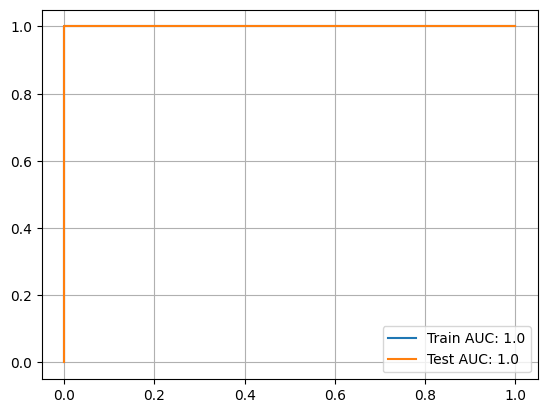

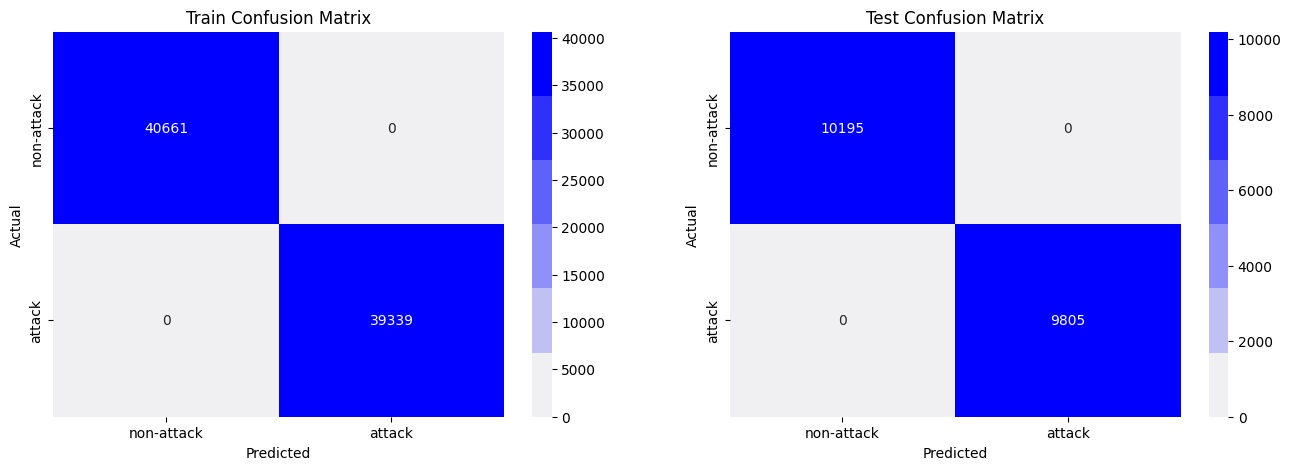

(StackingClassifier(classifiers=[DecisionTreeClassifier(criterion='entropy',
                                                        random_state=26),
                                 RandomForestClassifier(criterion='entropy'),
                                 SVC(probability=True), LogisticRegression(),
                                 KNeighborsClassifier(), GaussianNB(),
                                 BaggingClassifier(random_state=26),
                                 GradientBoostingClassifier(random_state=26)],
                    meta_classifier=LogisticRegression()),
 1.0,
 1.0,
 1.0,
 1.0)

In [65]:
model_names = ["DTclassifier","RandomForestclassifier", "SVMclassifier", "LOGISTICclassifier", "KNNclassifier", "GNBclassifier", "BaggingClassifier", "GBM"]
model_vars = [eval(n) for n in model_names]
stacked = StackingClassifier(
    classifiers=model_vars,
    meta_classifier=LogisticRegression(),
    use_probas=False
)
evaluate_result(stacked, X_train, y_train, X_test, y_test, "Stacking Classifier")

Streamlit display

In [35]:
param_grid = {
    'Logistic Regression': {'C': uniform(0.1, 100)},
    'K Nearest Neighbors': {'n_neighbors': randint(1, 21)},
    'Decision Tree': {'max_depth': randint(1, 10)},
    'Random Forest': {'n_estimators': randint(1, 100), 'max_depth': randint(1, 10)},
    'Support Vector Classifier': {'C': uniform(0.1, 100), 'gamma': ['scale', 'auto']},
    'Gaussian Naive Bayes': {},
    'LightGBM': {'learning_rate': uniform(0.01, 0.5), 'max_depth': randint(1, 10)},
    'SGD Classifier': {'alpha': uniform(0.0001, 0.1), 'penalty': ['l1', 'l2', 'elasticnet']}
}

In [ ]:
if st.sidebar.button("Predict"):
    # Perform prediction
    prediction =  loaded_model.predict(X_test)
    print('Prediction::',prediction)
    st.header("Prediction")
    st.write(f"The predicted outcome is: {prediction[0]}")

Combine classifiers

In [38]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://loca.lt/mytunnelpassword').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 104.155.224.20


In [39]:
#/content/drive/MyDrive/dmpackage.py
!streamlit run /content/drive/MyDrive/dmpackage.py  &>/content/logs.txt & npx localtunnel --port 8501 & curl https://loca.lt/mytunnelpassword

npx: installed 22 in 3.644s
your url is: https://spicy-rockets-turn.loca.lt
